In [ ]:
from google.colab import drive
# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


(1126, 853)


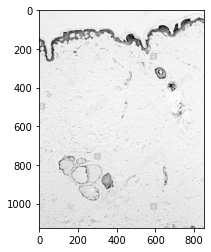

array([[230, 235, 240, ..., 245, 246, 246],
       [230, 235, 240, ..., 239, 240, 244],
       [233, 237, 241, ..., 244, 245, 247],
       ...,
       [195, 206, 219, ..., 209, 204, 215],
       [203, 218, 227, ..., 217, 210, 219],
       [217, 231, 235, ..., 226, 213, 219]], dtype=uint8)

In [ ]:
import numpy as np
import cv2 as cv
from numpy import linalg as LA
from matplotlib import pyplot as plt

img_address = "drive/My Drive/skinCells.jpg"
img = cv.imread(img_address)
img = img[:,:,2]
print(img.shape)
width, height = img.shape
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
img

In [ ]:
import sys
sys.setrecursionlimit(10**9)

def region_growing(x, y, label, labels):
  if labels[x][y] > 0 :
    return labels
  # print("test")
  labels[x][y] = label
  pixel = (x,y)
  threshold = 50
  neighbouringPixels = [(x-1, y), (x-1, y-1), (x-1, y+1), (x, y-1), (x, y+1), (x+1, y), (x+1, y-1), (x+1, y+1)]
  thresholdPixels = []
  for i in neighbouringPixels:
    if i[0] >= 0 and i[0] < width and i[1] >= 0 and i[1] < height:
      if labels[i[0]][i[1]] == 0 :
        temp1 = img[pixel]
        temp2 = img[i]
        #print(temp1, temp2)
        temp3 = temp1 - temp2
        #print(temp3)
        #print(abs(temp3))
        if abs(img[pixel] - img[i]) < threshold : 
          thresholdPixels.append(i)
  for p in thresholdPixels :
    # print("*********************************")
    labels = region_growing(p[0], p[1] , label, labels)
  #print("&&&&&&&&")
  return labels;


# TEST
temp =  np.zeros((width, height), dtype=np.int32)
temp = region_growing(0,0 ,3, temp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in ubyte_scalars


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import sys
sys.setrecursionlimit(10**9)

def setLabels():
  labels = np.zeros((width, height), dtype=np.int32)
  label = 0
  for y in range(0, height-1):
    for x in range(0, width-1):
      if labels[x][y] == 0 :
        label +=1
        labels = region_growing(x, y, label, labels)
  #print(labels)
  return labels ,label


labels ,label = setLabels()

In [ ]:
dic=np.zeros(label+1, np.int32)
for i in range(0, labels.shape[0]):
  for j in range(0, labels.shape[1]):
    dic[labels[i][j]] +=1
    ma ,mai = 0,0
for i in range(0, len(dic)):
  if dic[i]>ma:
    ma=dic[i]
    mai = i

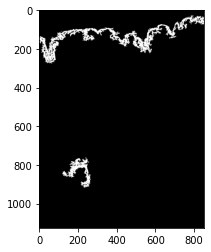

In [ ]:
# print(len(dic))
new_img = np.zeros((img.shape[0], img.shape[1]), np.int32)
for k in range (len(dic)):
  # print(k)
  if dic[k]>6000:
    # print(dic[k])
    for i in range(0, labels.shape[0]):
      for j in range(0, labels.shape[1]):
        if labels[i][j] == k:
          new_img[i][j] = 255
plt.imshow(new_img, cmap=plt.get_cmap('gray'))
plt.show()